<a href="https://colab.research.google.com/github/doissegundos/Analise_IBGE_2015/blob/main/IBGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IBGE

Esta pesquisa vai analisar dados disponiveis pelo IBGE sobre a população. O dataset utilizado contém dados relacionados ao Sexo, Idade, Cor, Anos de Estudo, Renda e Altura da população basileira, do ano de 2015.
Dataset disponivel em: https://www.ibge.gov.br/estatisticas/sociais/populacao/9127-pesquisa-nacional-por-amostra-de-domicilios.html?=&t=microdados

Obs: Essa é uma atividade do curso de Probabilidade e Estatistica 1, ministrada pela Alura.

### Exploração

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

In [1]:
from google.colab import drive
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Para os arquivos do Drive
drive.mount('/content/drive')
root_path = "drive/My Drive/dataset"

Mounted at /content/drive


In [3]:
#Importando o dataset do drive
df = pd.read_csv(r'drive/My Drive/datasets/ibge.csv')

Exibindo as 5 primeiras linhas do dataset

In [4]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [10]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

#### Frequencia da variavel Renda

 Para avaliarmos o comportamento da variável RENDA foi construida uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda foi considerado que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.


In [27]:
classes = [0,1576,3152,7880,15760,200000]
labels = ['E','D','C','B','A']
freq_renda = pd.cut(x = df["Renda"],
       bins = classes,
       labels = labels,
       include_lowest = True)

In [28]:
freq_renda = freq_renda.value_counts().to_frame().reset_index()
freq_renda.columns = ["Classe","Quantidade de Individuos"]

In [29]:
freq_renda

,Classe,Quantidade de Individuos
0,E,49755
1,D,16700
2,C,7599
3,B,2178
4,A,608


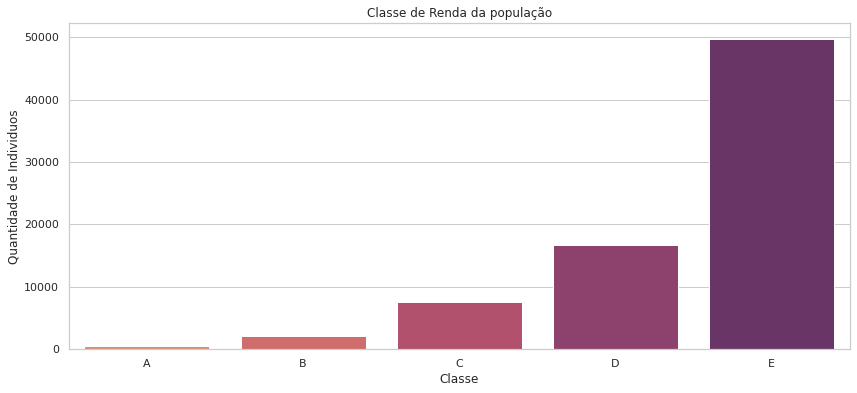

In [30]:
plt.figure(figsize=(14, 6))
sns.set_theme(style="whitegrid")
sns.barplot(x = "Classe",y = "Quantidade de Individuos",data=freq_renda,palette="flare", order =["A","B","C","D","E"])
plt.title('Classe de Renda da população') 
plt.show()

#### Frequencia da variavel Anos de Estudo

In [ ]:
freq_anos_estudo = pd.value_counts(
    df["Anos de Estudo"]
)

perc_anos_estudo = pd.value_counts(
    df["Anos de Estudo"],
    normalize = True
) * 100


In [ ]:
freq_anos_estudo

12    20848
16    10795
9      7980
5      6729
1      5849
6      4499
4      2891
8      2689
7      2445
11     2118
3      2101
10     1840
13     1836
15     1388
2      1388
14     1253
17      191
Name: Anos de Estudo, dtype: int64

In [ ]:
dist_freq_anos_estudo = pd.DataFrame(
    {'Frequência': freq_anos_estudo, 'Porcentagem (%)': perc_anos_estudo}
)

dist_freq_anos_estudo.rename_axis('Descricao', axis= 'columns', inplace = True)

dist_freq_anos_estudo.sort_index(ascending = True, inplace = True)

In [ ]:
dist_freq_anos_estudo

Descricao,Frequência,Porcentagem (%)
1,5849,7.611921
2,1388,1.806351
3,2101,2.734253
4,2891,3.762363
5,6729,8.757158
6,4499,5.855023
7,2445,3.181936
8,2689,3.499479
9,7980,10.385216
10,1840,2.394586


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


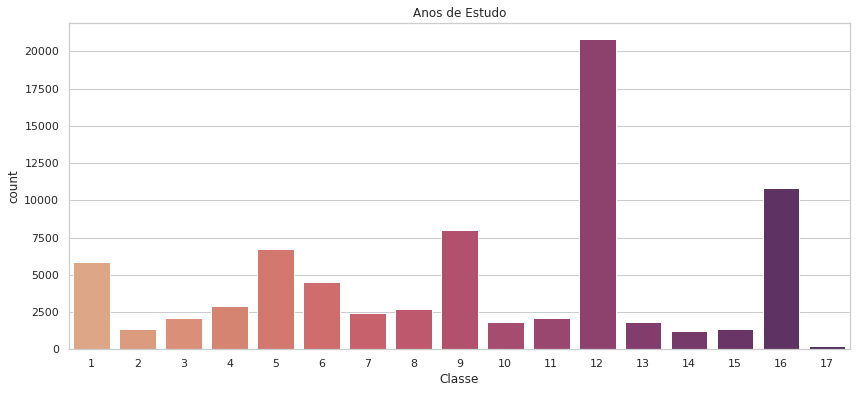

In [ ]:
plt.figure(figsize=(14, 6))
sns.set_theme(style="whitegrid")
data = df["Anos de Estudo"].to_frame().reset_index()
data.columns = ["index", "Classe"]
sns.countplot("Classe",data=data,palette="flare")
plt.title("Anos de Estudo") 
plt.show()

#### Media, Moda, Desvio Médio Absoluto, Variancia Amostral, Desvio Padrão e Mediana da Renda da população

In [31]:
media_renda = df["Renda"].mean()
moda_renda = df["Renda"].median()
mediana_renda = df["Renda"].mode()
variancia_renda = df["Renda"].var()
dpadrao_renda = df["Renda"].std()
dmedio_absoluto_renda = df["Renda"].mad()

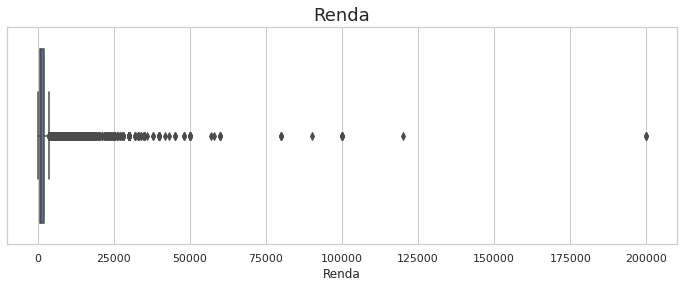

In [32]:
ax = sns.boxplot(x = 'Renda', data = df, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax

Ficou perceptivel no gráfico anterior que a renda é bem descentralizada, por esse motivo vamos fazer a exibição da dispersão da renda que tem valor maximo igual a 10 mil

In [33]:
df_renda = df.query("Renda < 10000")

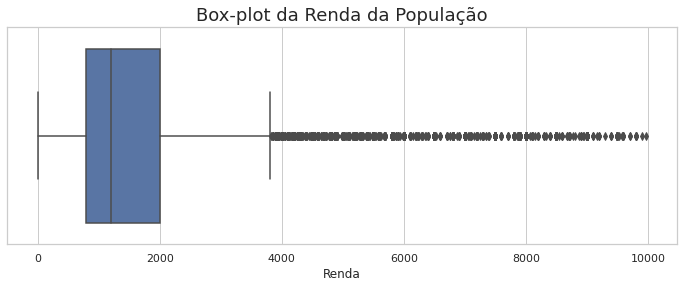

In [34]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = 'Renda', data = df_renda, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Box-plot da Renda da População', fontsize=18)
ax

A média salarial de acordo com o sexo. Como pode-se notar, pessoas do sexo masculino tem reda salarial maior do que pessoas do sexo feminino.

In [ ]:
media_renda_sexo = df.groupby(["Sexo"])["Renda"].mean()
media_renda_sexo

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

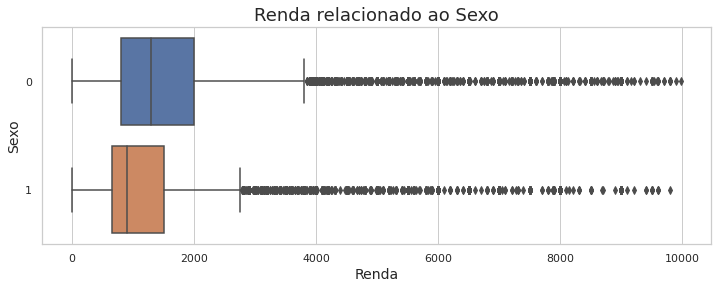

In [ ]:
ax = sns.boxplot(x = 'Renda', y = 'Sexo', data = df_renda, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda relacionado ao Sexo', fontsize=18)
ax.set_xlabel('Renda', fontsize=14)
ax.set_ylabel('Sexo', fontsize=14)
ax

A média salarial de acordo com os anos de estudo. Fica claro que quanto mais anos de estudo maior é o salario médio.

In [ ]:
media_renda_anos_estudo = df.groupby(["Anos de Estudo"])["Renda"].mean()
media_renda_anos_estudo

Anos de Estudo
1      732.994187
2      806.524496
3      842.560209
4      980.044275
5     1150.439293
6     1183.575683
7     1284.082618
8     1289.166233
9     1437.744862
10    1315.685870
11    1495.901322
12    1841.671287
13    2185.769063
14    2758.774142
15    3099.840058
16    5242.443353
17    1071.717277
Name: Renda, dtype: float64

A média salarial de acordo com a cor. O que deixa claro que pessoas negras e indigenas tem uma renda salárial menor.

In [ ]:
media_renda_cor = df.groupby(["Cor"])["Renda"].mean()
media_renda_cor

Cor
0    1472.887955
2    2679.019331
4    1442.294840
6    4182.920455
8    1513.596103
Name: Renda, dtype: float64

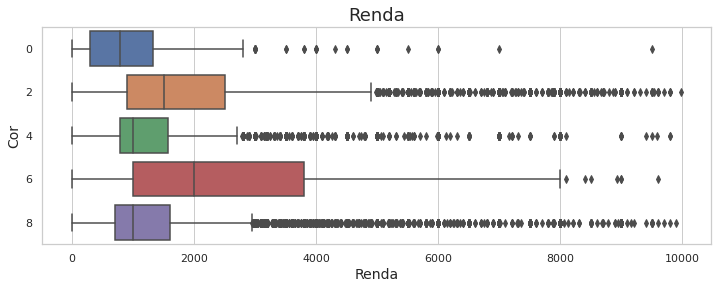

In [ ]:
ax = sns.boxplot(x = 'Renda', y = 'Cor', data = df_renda, orient = 'h', )
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda relacionado a Cor', fontsize=18)
ax.set_xlabel('Renda', fontsize=14)
ax.set_ylabel('Cor', fontsize=14)
ax

#### Analise da variavel de Anos de Estudo da população

Relação dos anos de estudo com o sexo. Fica claro que pessoas do sexo feminino tem mais anos de estudo do que pessoas do sexo masculino.

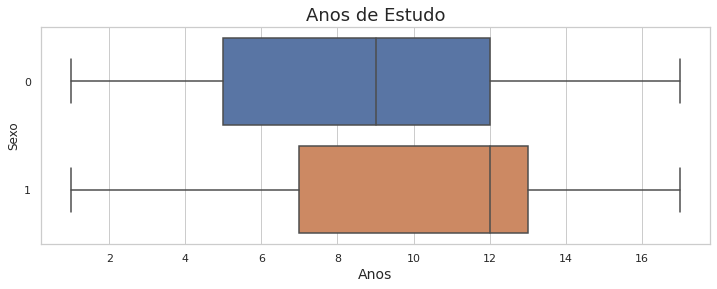

In [ ]:
ax = sns.boxplot(x = 'Anos de Estudo', y = 'Sexo', data = df, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

Relação da cor com os Anos de Estudo. Fica claro que pessoas com a cor branca e amarela tem uma media maior de anos de estudo.

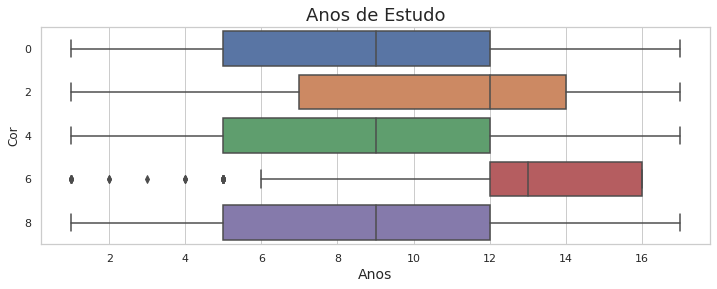

In [ ]:
ax = sns.boxplot(x = 'Anos de Estudo', y = 'Cor', data = df, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

#### Média, mediana e valor máximo da variável RENDA segundo SEXO e COR

In [11]:
renda_estatisticas_por_sexo_e_cor = pd.crosstab(df["Cor"], 
                                                df["Sexo"], 
                                                values = df["Renda"], 
                                                aggfunc = {'mean', 'median', 'max'})
renda_estatisticas_por_sexo_e_cor.rename(index = cor, inplace = True)
renda_estatisticas_por_sexo_e_cor.rename(columns = sexo, inplace = True)
renda_estatisticas_por_sexo_e_cor


max                   mean                 median         
Sexo     Masculino  Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                      
Indígena   10000.0  120000.0  1081.710938  2464.386139     797.5    788.0
Branca    200000.0  100000.0  2925.744435  2109.866750    1700.0   1200.0
Preta      50000.0   23000.0  1603.861687  1134.596400    1200.0    800.0
Amarela    50000.0   20000.0  4758.251064  3027.341880    2800.0   1500.0
Parda     100000.0   30000.0  1659.577425  1176.758516    1200.0    800.0

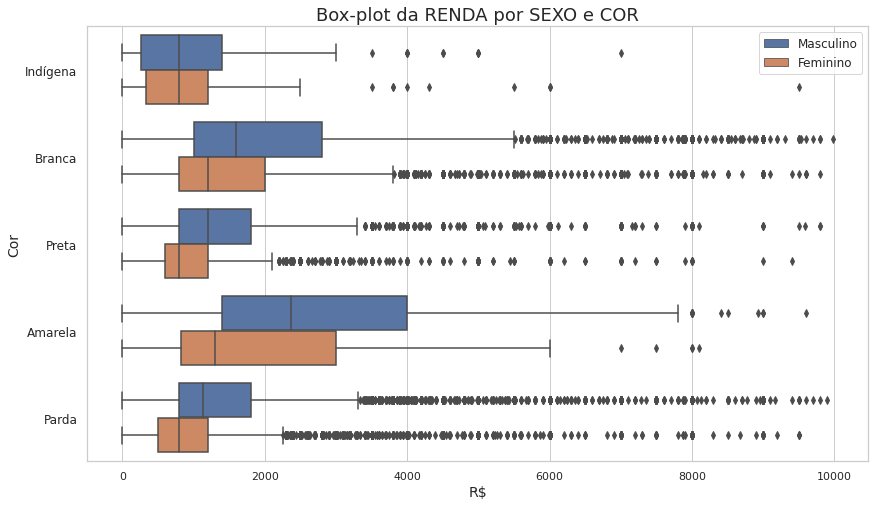

In [18]:
ax = sns.boxplot(x = 'Renda', y = 'Cor', hue = 'Sexo', data=df.query('Renda < 10000'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por SEXO e COR', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Cor', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)    # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax

####  Média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO

In [19]:
renda_estatisticas_por_sexo_e_estudo = pd.crosstab(df['Anos de Estudo'], 
                                         df.Sexo,
                                         aggfunc = {'mean', 'median', 'max', 'std'},
                                         values = df.Renda).round(2)
renda_estatisticas_por_sexo_e_estudo.rename(index = anos_de_estudo, inplace = True)
renda_estatisticas_por_sexo_e_estudo.rename(columns = sexo, inplace = True)
renda_estatisticas_por_sexo_e_estudo

max            ...       std         
Sexo                           Masculino  Feminino  ... Masculino Feminino
Anos de Estudo                                      ...                   
Sem instrução e menos de 1 ano   30000.0   10000.0  ...   1023.90   639.31
1 ano                            30000.0    2000.0  ...   1331.95   425.29
2 anos                           40000.0    4000.0  ...   1435.17   498.23
3 anos                           80000.0    3500.0  ...   2143.80   424.12
4 anos                           50000.0   10000.0  ...   1419.82   629.55
5 anos                           35000.0    8000.0  ...   1484.65   635.78
6 anos                           25000.0    6000.0  ...   1476.63   574.55
7 anos                           40000.0    9000.0  ...   1419.71   602.04
8 anos                           30000.0   18000.0  ...   1515.58   896.78
9 anos                           60000.0   20000.0  ...   2137.66   973.22
10 anos                          45000.0    6000.0  ...   2078.61   620.61
11 anos                         200000.0  100000.0  ...   2676.54  1819.04
12 anos                          30000.0  120000.0  ...   2268.08  4851.83
13 anos                          25000.0   20000.0  ...   2797.12  2053.79
14 anos                          50000.0   20000.0  ...   3987.21  2064.08
15 anos ou mais                 200000.0  100000.0  ...   7447.61  4212.77
Não determinados                  7000.0    3000.0  ...    979.65   459.99

[17 rows x 8 columns]

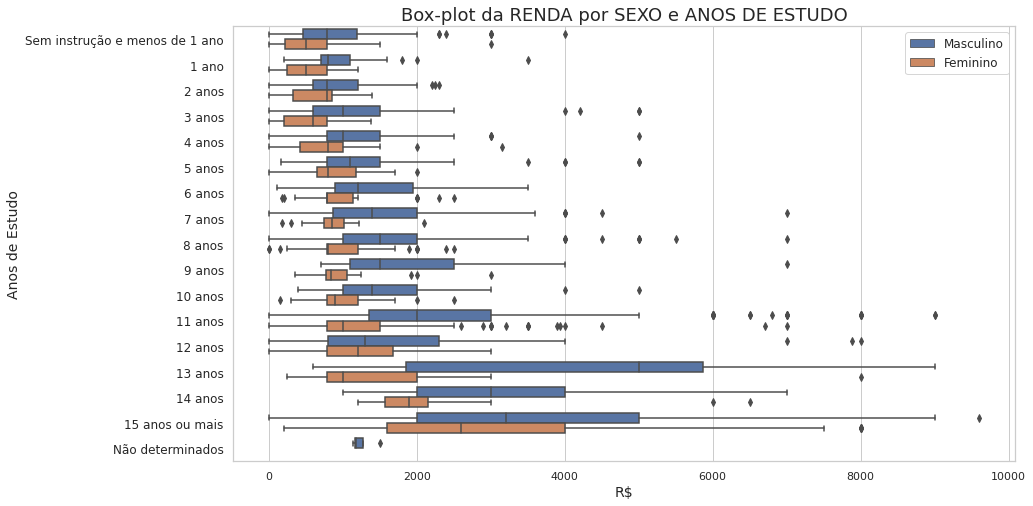

In [20]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data=df.query('Renda < 10000 and Idade == 50'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por SEXO e ANOS DE ESTUDO', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Anos de Estudo', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax

#### Média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO

In [22]:
renda_estatisticas_por_uf = df.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
renda_estatisticas_por_uf.rename(index = uf)

Renda                            
                            mean median     max          std
UF                                                          
Rondônia             1789.761223   1200   50000  2406.161161
Acre                 1506.091782    900   30000  2276.233415
Amazonas             1445.130100    900   22000  1757.935591
Roraima              1783.588889   1000   20000  2079.659238
Pará                 1399.076871    850   50000  2053.779555
Amapá                1861.353516   1200   15580  2020.688632
Tocantins            1771.094946   1000   60000  2934.590741
Maranhão             1019.432009    700   30000  1887.816905
Piauí                1074.550784    750   40000  2373.355726
Ceará                1255.403692    789   25000  1821.963536
Rio Grande do Norte  1344.721480    800   15500  1651.805500
Paraíba              1293.370487    788   30000  1950.272431
Pernambuco           1527.079319    900   50000  2389.622497
Alagoas              1144.552602    788   11000  1237.856197
Sergipe              1109.111111    788   16000  1478.997878
Bahia                1429.645094    800  200000  3507.917248
Minas Gerais         2056.432084   1200  100000  3584.721547
Espírito Santo       2026.383852   1274  100000  3513.846868
Rio de Janeiro       2496.403168   1400  200000  5214.583518
São Paulo            2638.104986   1600   80000  3503.777366
Paraná               2493.870753   1500  200000  4302.937995
Santa Catarina       2470.854945   1800   80000  3137.651112
Rio Grande do Sul    2315.158336   1500   35000  2913.335783
Mato Grosso do Sul   2262.604167   1500   42000  3031.419122
Mato Grosso          2130.652778   1500   35000  2542.630178
Goiás                1994.580794   1500   30000  2221.933065
Distrito Federal     4241.954722   2000  100000  5550.463338

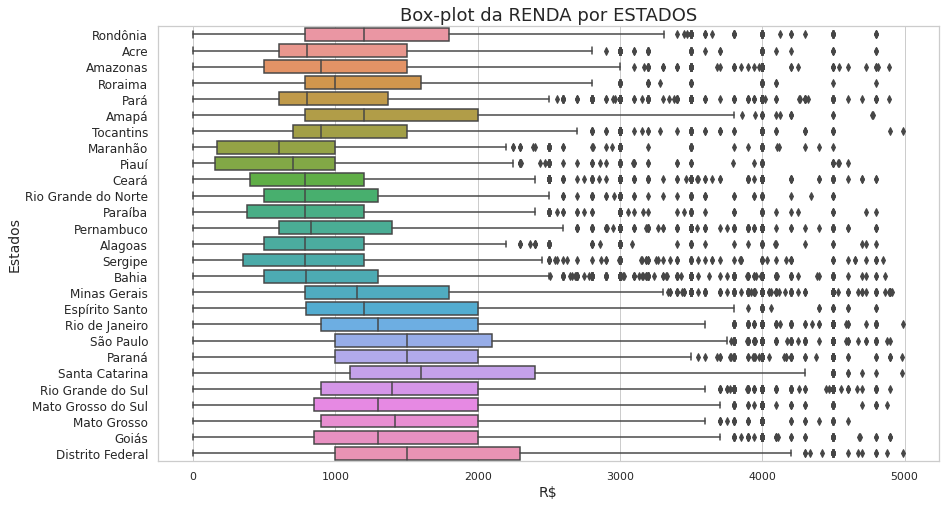

In [26]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data=df.query('Renda < 5000'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por ESTADOS', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Estados', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels([key for key in uf.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y

ax